In [32]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

In [48]:
def get_stock_data(symbol):
    stock_data = yf.download(symbol)
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title(f'{symbol} Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    # Return both stock data and its corresponding dates
    return stock_data[['Open', 'High', 'Low', 'Close', 'Volume']], stock_data.index


In [34]:
# Function to create sequences for training
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

In [35]:
def plot_predictions_with_dates(dates, actual, predicted, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, actual, label='Actual')  # No need to flatten
    plt.plot(dates, predicted, label='Predicted')  # No need to flatten
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()


In [43]:
# Define stock symbols and date range
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2014-01-01'
end_date = '2023-01-01'

# Define LSTM parameters
sequence_length = 10

In [37]:
# Function to evaluate model performance
def evaluate_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")


In [38]:
# Function to forecast future values with an LSTM model
def forecast_future_values(model, scaler, last_sequence, n_future_steps=5):
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_future_steps):
        # Reshape the current sequence for prediction
        current_sequence_reshaped = current_sequence[np.newaxis, :, :]
        # Predict the next value
        predicted_next_value = model.predict(current_sequence_reshaped)
        # Inverse transform the predicted value
        predicted_next_value_transformed = scaler.inverse_transform(predicted_next_value)
        # Store the predicted value
        future_predictions.append(predicted_next_value_transformed.ravel()[0])
        # Update the sequence with the predicted value (for the next prediction)
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = predicted_next_value
        
    return np.array(future_predictions)


[*********************100%%**********************]  1 of 1 completed


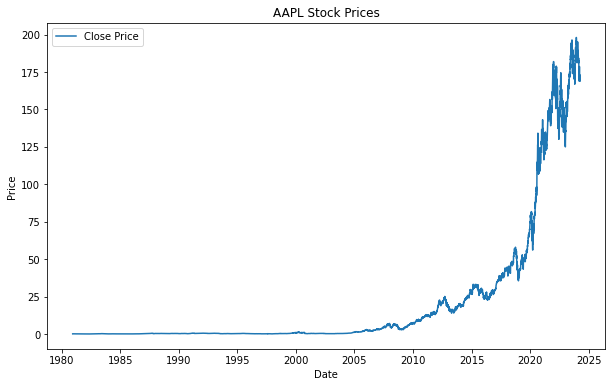

Epoch 1/10
246/246 - 6s - loss: 1.0074e-05 - val_loss: 8.6422e-05 - 6s/epoch - 24ms/step
Epoch 2/10
246/246 - 2s - loss: 4.4215e-06 - val_loss: 2.0459e-05 - 2s/epoch - 6ms/step
Epoch 3/10
246/246 - 2s - loss: 3.6568e-06 - val_loss: 2.3863e-05 - 2s/epoch - 6ms/step
Epoch 4/10
246/246 - 2s - loss: 3.6725e-06 - val_loss: 4.1112e-05 - 2s/epoch - 6ms/step
Epoch 5/10
246/246 - 1s - loss: 3.3135e-06 - val_loss: 1.8408e-05 - 1s/epoch - 6ms/step
Epoch 6/10
246/246 - 2s - loss: 3.2910e-06 - val_loss: 1.1412e-05 - 2s/epoch - 6ms/step
Epoch 7/10
246/246 - 2s - loss: 3.6266e-06 - val_loss: 1.9822e-05 - 2s/epoch - 6ms/step
Epoch 8/10
246/246 - 2s - loss: 3.7320e-06 - val_loss: 5.3447e-05 - 2s/epoch - 6ms/step
Epoch 9/10
Restoring model weights from the end of the best epoch: 6.
246/246 - 2s - loss: 3.2869e-06 - val_loss: 1.9086e-05 - 2s/epoch - 6ms/step
Epoch 9: early stopping
69/69 [==============================] - 1s 2ms/step


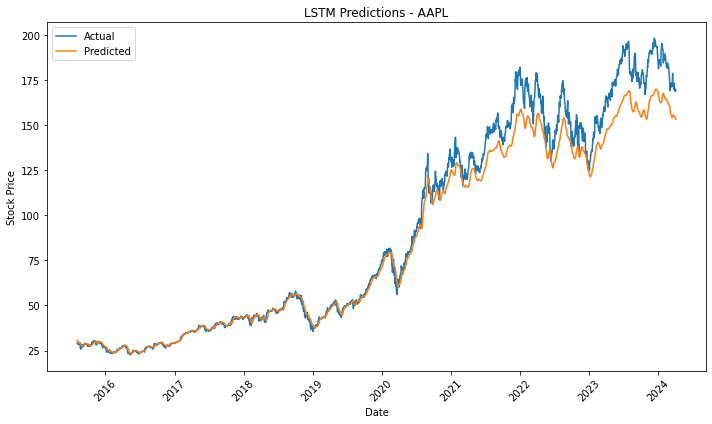

Evaluating LSTM Performance for AAPL
Mean Squared Error (MSE): 103.4731179773679
Root Mean Squared Error (RMSE): 10.172173709555294
Mean Absolute Error (MAE): 6.48757859919729
R^2 Score: 0.9687343576475906


[*********************100%%**********************]  1 of 1 completed


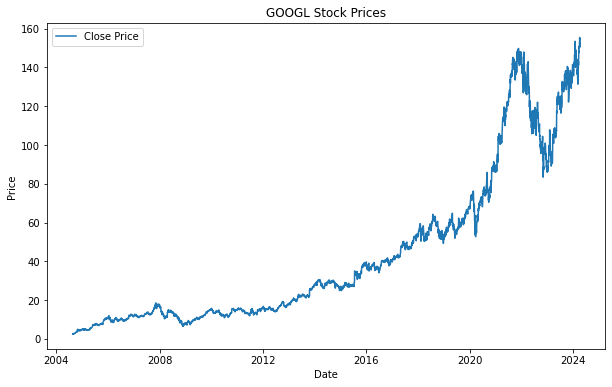

Epoch 1/10
111/111 - 5s - loss: 0.0013 - val_loss: 3.9388e-04 - 5s/epoch - 44ms/step
Epoch 2/10
111/111 - 1s - loss: 2.4697e-04 - val_loss: 2.4055e-04 - 695ms/epoch - 6ms/step
Epoch 3/10
111/111 - 1s - loss: 2.3824e-04 - val_loss: 3.6177e-04 - 695ms/epoch - 6ms/step
Epoch 4/10
111/111 - 1s - loss: 2.1829e-04 - val_loss: 2.2022e-04 - 698ms/epoch - 6ms/step
Epoch 5/10
111/111 - 1s - loss: 1.7516e-04 - val_loss: 1.9506e-04 - 697ms/epoch - 6ms/step
Epoch 6/10
111/111 - 1s - loss: 1.8440e-04 - val_loss: 2.5730e-04 - 716ms/epoch - 6ms/step
Epoch 7/10
111/111 - 1s - loss: 1.5324e-04 - val_loss: 2.4593e-04 - 697ms/epoch - 6ms/step
Epoch 8/10
Restoring model weights from the end of the best epoch: 5.
111/111 - 1s - loss: 1.5816e-04 - val_loss: 4.5922e-04 - 706ms/epoch - 6ms/step
Epoch 8: early stopping
31/31 [==============================] - 1s 2ms/step


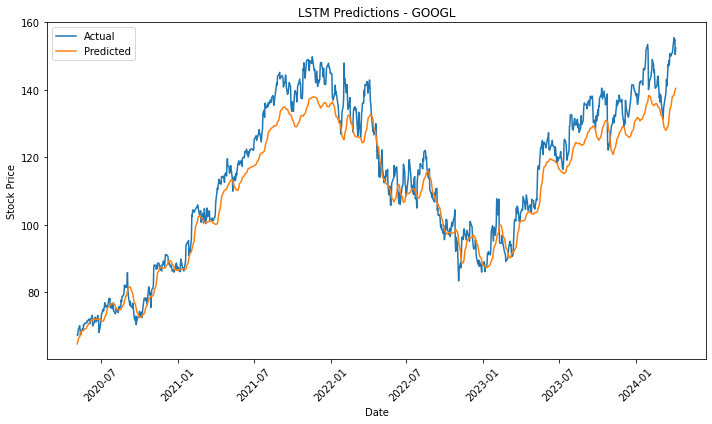

Evaluating LSTM Performance for GOOGL
Mean Squared Error (MSE): 44.89516162746858
Root Mean Squared Error (RMSE): 6.700385185007544
Mean Absolute Error (MAE): 5.356070992915222
R^2 Score: 0.9170557006959734


[*********************100%%**********************]  1 of 1 completed


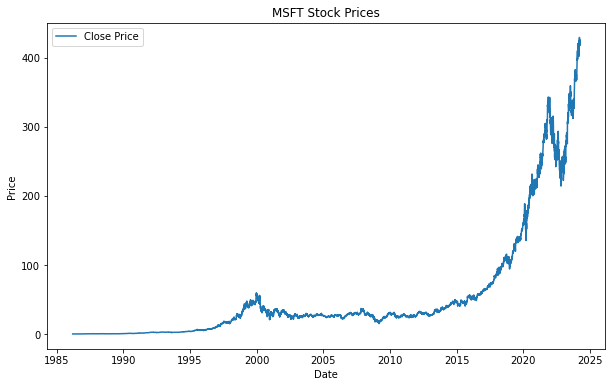

Epoch 1/10
216/216 - 6s - loss: 9.1652e-05 - val_loss: 1.4665e-05 - 6s/epoch - 28ms/step
Epoch 2/10
216/216 - 1s - loss: 2.3262e-05 - val_loss: 1.8515e-05 - 1s/epoch - 7ms/step
Epoch 3/10
216/216 - 1s - loss: 1.8298e-05 - val_loss: 1.5175e-05 - 1s/epoch - 7ms/step
Epoch 4/10
Restoring model weights from the end of the best epoch: 1.
216/216 - 1s - loss: 1.5420e-05 - val_loss: 2.1108e-05 - 1s/epoch - 6ms/step
Epoch 4: early stopping
60/60 [==============================] - 1s 2ms/step


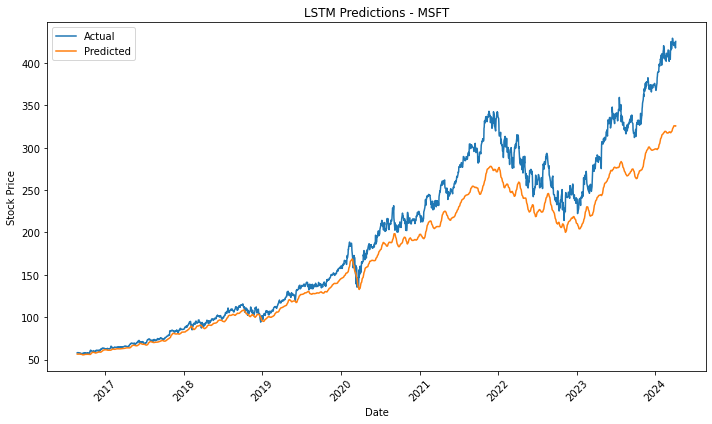

Evaluating LSTM Performance for MSFT
Mean Squared Error (MSE): 1224.571270953511
Root Mean Squared Error (RMSE): 34.993874763356956
Mean Absolute Error (MAE): 25.437109987500687
R^2 Score: 0.8790134189822958


In [50]:
for symbol in symbols:
    stock_data, dates = get_stock_data(symbol)
    
    # Normalize the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(stock_data)
    
    # Extract and scale the Close price for y
    close_scaler = MinMaxScaler()
    close_prices_scaled = close_scaler.fit_transform(stock_data[['Close']])
    
    # Create sequences with all features but target the scaled Close prices
    X, y = create_sequences(data_scaled, close_prices_scaled.flatten(), sequence_length)
    
    # Split the data into training and testing sets
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Build the LSTM model with dropout for regularization
    lstm_model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(sequence_length, data_scaled.shape[1])),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

    # Train the LSTM model
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping])
    
    # Predict on the test set with the LSTM model
    predictions_scaled_lstm = lstm_model.predict(X_test)
    
    # Correctly inverse transform the predictions
    predictions_lstm = close_scaler.inverse_transform(predictions_scaled_lstm)
    y_test_original = close_scaler.inverse_transform(y_test.reshape(-1, 1))

    prediction_dates = dates[split_index + sequence_length:][:len(predictions_lstm)]

    
    # Since we no longer concatenate and inverse the entire dataset, this part is simplified
    plot_predictions_with_dates(prediction_dates, y_test_original, predictions_lstm, f'LSTM Predictions - {symbol}')

    
    # Evaluate LSTM model performance with additional metrics
    print(f'Evaluating LSTM Performance for {symbol}')
    evaluate_model_performance(y_test_original, predictions_lstm)